In [2]:
#%reset -f
import pandas as pd
import numpy as np

import datetime as dt
import random
import time
import math
import itertools
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import scipy.integrate as integrate
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.signal as sig
from IPython.display import clear_output
from graphviz import Digraph
from threading import Thread
import threading
import queue

In [3]:
almNum = 3
ocorr = 100
t_sample = 60
base_hour = dt.datetime(2018, 1,9,9,0,0)
occor_num = 0

#Settings alarms
a = np.zeros(1, dtype=int)
ocorr = 10
duration = 120 #120sec
hour_init = base_hour

b = np.zeros(1, dtype=int)
pAb =1
delay_b = 60 #seconds
duration_b = 120

c = np.zeros(1, dtype=int)
pAc = 0.6
delay_c = 15 #seconds
duration_c = 120

#Alarm Series Generation, A (cause), B(Effect). C(Effect)
while(occor_num < ocorr): 
    
    #A generation - begin
    srtd_hour = random.normalvariate(3, 1)
    srtd_hour_begin = hour_init + dt.timedelta(hours=srtd_hour)
    srtd_hour_end = srtd_hour_begin + dt.timedelta(seconds = duration)

    idx_init_a_occor = int(math.ceil((srtd_hour_begin - base_hour).total_seconds()/t_sample))
    idx_end_a_occor = int(math.ceil((srtd_hour_end - base_hour).total_seconds()/t_sample))
        
    if(idx_end_a_occor > a.size):
            a.resize(idx_end_a_occor)

    for i in np.arange(idx_init_a_occor, idx_end_a_occor + 1):
        a[i-1] = 1
    #A generation - end
         
    
    #B generation begin
    srtd_prob_b = random.uniform(0,1)  
    if srtd_prob_b <= pAb:
        srtd_hour_begin_b = srtd_hour_begin + dt.timedelta(hours = delay_b/3600)
        srtd_hour_end_b = srtd_hour_begin_b + dt.timedelta(seconds=duration_b)

        idx_init_b_occor = int(math.ceil((srtd_hour_begin_b - base_hour).total_seconds()/t_sample))
        idx_end_b_occor = int(math.ceil((srtd_hour_end_b - base_hour).total_seconds()/t_sample))

        if(idx_end_b_occor > b.size):
                b.resize(idx_end_b_occor)

        for j in np.arange(idx_init_b_occor, idx_end_b_occor +1):
            b[j-1] =  1  
    #B generation end

    #C generation begin
    srtd_prob_c = random.uniform(0,1)
    if srtd_prob_c <= pAc:
        srtd_hour_begin_c = srtd_hour_begin + dt.timedelta(hours = delay_b/3600)
        srtd_hour_end_c = srtd_hour_begin_c + dt.timedelta(seconds=duration_c)

        idx_init_c_occor = int(math.ceil((srtd_hour_begin_c - base_hour).total_seconds()/t_sample))
        idx_end_c_occor = int(math.ceil((srtd_hour_end_c - base_hour).total_seconds()/t_sample))
        
        if(idx_end_c_occor > c.size):
            c.resize(idx_end_c_occor)

        for j in np.arange(idx_init_c_occor, idx_end_c_occor +1):
            c[j-1] = 1    
    #C generation end
    
    hour_init = srtd_hour_begin
    occor_num = occor_num + 1

#Making series the same length
max_len = max(a, b, c, key=len).size
a = np.concatenate([a, np.zeros(max_len - a.size)])
b = np.concatenate([b, np.zeros(max_len - b.size)])
c = np.concatenate([c, np.zeros(max_len - c.size)])
sum(a)

30.0

In [4]:
def get_lim_index(cdf, lim):
    summation = 0
    index = 0
    for i in np.arange(0, cdf.size):
        if(summation < lim):
            summation += cdf[i]
        else:
            index = i-1
            break
    return index
    

In [112]:
# def significance_test(k,l,h,sup_lim, n, a,b):
#     '''
#         significance_test(a,b,k,l,h,sup_lim, n)
#     '''
#     nt = 4
#     transferEntropies = np.zeros(n)
#     count  = 0
    
#     np.random.seed(int(time.time()))
#     for t in np.arange(0,nt):
#         fact = int(np.ceil(n/nt))
#         count = count + fact
#         if count > n:
#             fact = count - n - int((1 - n//nt)*nt)
#         print(t)
#         myThread(t, k,l,h, a, b, fact).start()
#     for i in range(n):
#         transferEntropies[i] = fila.get()
        
#     print(transferEntropies)
#     kde = sm.nonparametric.KDEUnivariate(transferEntropies)

#     kde.fit()
    
#     lvl_sig = kde.icdf[get_lim_index(kde.cdf, sup_lim)]
#     return lvl_sig

In [6]:
def significance_test(k,l,h,sup_lim, n, a,b):
    '''
        significance_test(a,b,k,l,h,sup_lim, n)
    '''
    transferEntropies = []
    
    np.random.seed(int(time.time()))
    for i in np.arange(0,n):
        surrogate_a = a.copy()
        np.random.shuffle(surrogate_a)
        transferEntropies.append(te(k,l,h,surrogate_a[:],b, 'serie_a', 'serie_b'))
    kde = sm.nonparametric.KDEUnivariate(transferEntropies)
    kde.fit()
#     plt.plot(kde.evaluate(kde.support))
#     plt.show()
#     plt.hist(transferEntropies)
#     plt.show()

  
    
    lvl_sig = kde.icdf[get_lim_index(kde.cdf, sup_lim)]
    return lvl_sig

In [71]:
te_matrix__samp_9710/4 - 10//4

0.5

In [7]:
def significance_value(k,l,h,n, te_val, a,b):
    '''
        significance_test(a,b,k,l,h,sup_lim, n)
    '''
    transferEntropies = []
    
    np.random.seed(int(time.time()))
    for i in np.arange(0,n):
        surrogate_a = a.copy()
        np.random.shuffle(surrogate_a)
        transferEntropies.append(te(k,l,h,surrogate_a[:],b, 'serie_a', 'serie_b'))
    kde = gaussian_kde(transferEntropies)    
    
    pcnt_sig = kde.integrate_box(-float("inf"), te_val)
    return pcnt_sig

In [8]:
def joint_probability(k,l, h, a, b):
    '''
        k B time horizon
        l A time horizon
        h instant in the future of serie B
        
        a, b array type'''

    #Alarm Series A (cause), B (effect), same len
    #tested
    sizeSeries = a.size
    transEntropy = 0
    numStates = 2**(k + l  + 1)
    combinations = list(map(list, itertools.product([0, 1], repeat=k+l+1)))
    counting = np.zeros(numStates)
    prob_cnjt = np.zeros(numStates)
    a_prob_ind = []
    b_prob_ind = []
    #joitn probability p(i_sub_t+1), i_sub_t**k, j_sub_t**l)
    inicio = np.max([k,l]) - 1
    for i in np.arange(inicio, sizeSeries - h):
        for hk in np.arange(0,k):
                b_prob_ind.append(b[i - hk])
        for hl in np.arange(0,l):
                a_prob_ind.append(a[i - hl])

        ab = [b[i + h]] + b_prob_ind + a_prob_ind 
        index_comb = combinations.index(ab)
        counting[index_comb] = counting[index_comb] + 1

        a_prob_ind = []
        b_prob_ind = []

    total = sum(counting)
    for i, cnt in enumerate(counting):
        if total != 0:
            prob_cnjt[i] = cnt/total
     
    return prob_cnjt

In [9]:
##for paper test
def joint_probability_new(k,l,h, a, b, lbl_a, lbl_b):
    '''
        k B time horizon
        l A time horizon
        h instant in the future of serie B
        
        a, b array type'''
    
    numStates=2**(k+l+1)
    combinations = list(map(list, itertools.product([0, 1], repeat=k+l+1)))
    prob_cnjt = np.zeros(numStates)
    
    #Alarm Series A (cause), B (effect), same len
    #teste   

    matrix_nova = np.matrix([b[1:],b[:-1],a[:-1]]).T
    df = pd.DataFrame(matrix_nova, columns = ['b_ftr', lbl_b, lbl_a])
    gpd = df.groupby(['b_ftr', lbl_b, lbl_a], as_index=False).size().reset_index(name='Count')
    total = sum(gpd['Count'])
    
    for i in np.arange(0,gpd.shape[0]):
        comb = [e for e in gpd.iloc[i][0:3].values.tolist()]
        idx = combinations.index(comb)
        prob_cnjt[idx] = gpd.iloc[i]['Count']/total

    return prob_cnjt

In [10]:
#Joint probability evaluation p(i_t+h, i_t**k)
#tested
def joint_prob_ih_ik(k,l, joint_prob_ih_ik_jl):
    states_ith_ik = list(map(list, itertools.product([0, 1], repeat=k + 1)))
    combinations = list(map(list, itertools.product([0, 1], repeat=k+l+1))) 
    p_jnt_ith_ik = np.zeros(2**(k+1))
    
    for i, state in enumerate(states_ith_ik):
        for j, comb in enumerate(combinations):
            if comb[0:k+1] == state:
                p_jnt_ith_ik[i] = p_jnt_ith_ik[i] + joint_prob_ih_ik_jl[j]
    return p_jnt_ith_ik

In [11]:
def conditional_prob(k,l,joint_prob):
    states = list(map(list, itertools.product([0, 1], repeat=k+l)))
    combinations = list(map(list, itertools.product([0, 1], repeat=k+l+1)))

    size = int(joint_prob.size/2)
    conditional = np.zeros(2**(k+l+1))

    for i,state in enumerate(states):
        index_zero = combinations.index([0] + state)
        prob_zero = joint_prob[index_zero]

        index_one = combinations.index([1] + state)
        prob_one = joint_prob[index_one]

        if(prob_zero + prob_one != 0):
            conditional[i] = prob_zero/(prob_zero+ prob_one)
            conditional[i + 2**(k+l)] = prob_one/(prob_zero+ prob_one)
    return conditional

In [12]:
#Division of the conditionals in log2 
#tested
def conditional_div(k,l,conditional_num, conditional_den):
    combinations = list(map(list, itertools.product([0, 1], repeat=k+l+1)))
    conditional_division = np.zeros(conditional_num.size)
    states_den = list(map(list, itertools.product([0, 1], repeat=1+k)))
    for j, comb in enumerate(combinations):
        if(conditional_den[states_den.index(comb[0:k+1])] != 0):
            conditional_division[j] = conditional_num[j]/conditional_den[states_den.index(comb[0:k+1])]            
    return conditional_division

In [13]:
#Transfer entropy final evaluation
def te(k,l,h,a,b, lbl_a, lbl_b):
    '''
        transentropy a->b
        te(k,l,h,a,b)
        k - dimension of b
        l - dimension of aDataFrame count duplicate rows and ...
        h -> instant in the future of a
    '''
    joint_p_ih_ik_jl = joint_probability_new(k,l,h,a,b, lbl_a, lbl_b)
    #joint_p_ih_ik_jl = joint_probability(k,l,h,a,b)
    
    joint_p_ih_ik = joint_prob_ih_ik(k,l, joint_p_ih_ik_jl)
    conditional_num = conditional_prob(k,l,joint_p_ih_ik_jl)
    conditional_den = conditional_prob(k,0, joint_p_ih_ik)    
    
    div = conditional_div(k,l,conditional_num, conditional_den)
    
    #log2 from the division of the conditionals ->
    #p(i_sub_t+h|i_sub_t**k, j_sub_t**l) /p(i_sub_t+h|i_t**k)
    
    log2_div_cond = np.log2(div[div!=0])
    te = np.sum(joint_p_ih_ik_jl[div!=0]*log2_div_cond)
    return te

In [23]:
def plot_mat_corrs(figsize, annot, matrix):
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
    sns.heatmap(matrix, cmap=cmap, center=0, annot=annot, vmin = 0, vmax=max(matrix.max()))
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.show()

In [15]:
def transferEnteropy_case(dist_df, pcnt_sig):
    transEntropy = np.zeros([dist6_sel_vars.columns.size,dist6_sel_vars.columns.size])
    sigValues =  np.zeros([dist6_sel_vars.columns.size,dist6_sel_vars.columns.size])
    for i in np.arange(0, dist_df.columns.size):
        for j in np.arange(0, dist_df.columns.size):
            if(j != i + dist_df.columns.size/2 and j!=i and j != i - dist_df.columns.size/2):
                transEntropy[i][j] = te(1,1,1,dist_df[dist_df.columns[i]],
                                         dist_df[dist_df.columns[j]],'serie_a', 'serie_b')

#                 sigValues[i][j] = significance_value(1,1,1,10, transEntropy[i][j], dist_df[dist_df.columns[i]],
#                                          dist_df[dist_df.columns[j]])
                sigValues[i][j] = significance_test(1,1,1,pcnt_sig,10,dist_df[dist_df.columns[i]],
                                                     dist_df[dist_df.columns[j]])
            clear_output()
            print('trans ', i, j)
            
    for i, j in zip(np.arange(0, transEntropy.shape[0]), np.arange(0, sigValues.shape[0])):
        for k, l in zip(np.arange(0, transEntropy.shape[1]), np.arange(0, sigValues.shape[1])):
            if transEntropy[i][k] != 0 and sigValues[j][l] >= transEntropy[i][k] :
                transEntropy[i][k] = 0
    
    return transEntropy  

In [16]:
#Variavéis analizadas 1,2,3,6,7,8,9,21,46

dist6 = pd.read_csv('dist6.csv', names=['xmeas%02d_low' % x for x in range(1, 74)] + ['xmeas%02d_high' % x for x in range(1, 74)])
dist6_sel_vars = dist6[['xmeas01_low', 'xmeas02_low', 'xmeas03_low', 
        'xmeas08_low', 'xmeas09_low', 'xmeas21_low',
        'xmeas01_high', 'xmeas02_high', 'xmeas03_high',
        'xmeas08_high', 'xmeas09_high', 'xmeas21_high']].copy()



In [31]:
#Com mdia movl de 8 amostras
dist_roll  = dist6_sel_vars.rolling(10).mean() #5 minutos
dist_roll.dropna(inplace=True)
dist_roll = dist_roll.round(decimals=0,).copy()
dist_roll.reset_index(drop=True, inplace=True)

dist6_resamp_move = pd.DataFrame([], columns= dist6_sel_vars.columns)
for col in dist6_sel_vars.columns:
    dist6_resamp_move[col] = np.abs(np.round(sig.resample(dist_roll[col],30720)))

In [27]:
dist6_resamp = pd.DataFrame([], columns= dist6_sel_vars.columns)
for col in dist6_sel_vars.columns:
    dist6_resamp[col] = np.abs(np.round(sig.resample(dist6_sel_vars[col],512)))

In [16]:
#df_s = dist6_sel_vars.groupby(lambda i: i // 17).agg(lambda g: 0 if np.sum(g) < 17/2 else 1)

In [88]:
#Media movel e normal
te_matrix_m_movel = transferEnteropy_case(dist_roll, 0.95)

trans  11 11


In [89]:
#Com media movel, normal  e p = 97
te_matrix_m_movel_97 = transferEnteropy_case(dist_roll, 0.97)

trans  11 11


In [32]:
#Com media movel e reamostrado de 1 min e com p = 0.97
te_matrix_movel_samp_97 = transferEnteropy_case(dist6_resamp_move, 0.97)

trans  11 11


In [17]:
#Sem mddia movel

te_matrix = transferEnteropy_case(dist6_sel_vars, 0.95)

trans  11 11


In [ ]:
#Sem mddia movel com p = 0.97
te_matrix_97 = transferEnteropy_case(dist6_sel_vars, 0.97)

trans  11 11


In [28]:
#sem mdia mvel com resamp de 1 min e p =95

te_matrix__samp_97 = transferEnteropy_case(dist6_resamp, 0.95)

trans  11 11


In [79]:
#np.savetxt("te_matrix_samp.csv", te_matrix, delimiter=",")

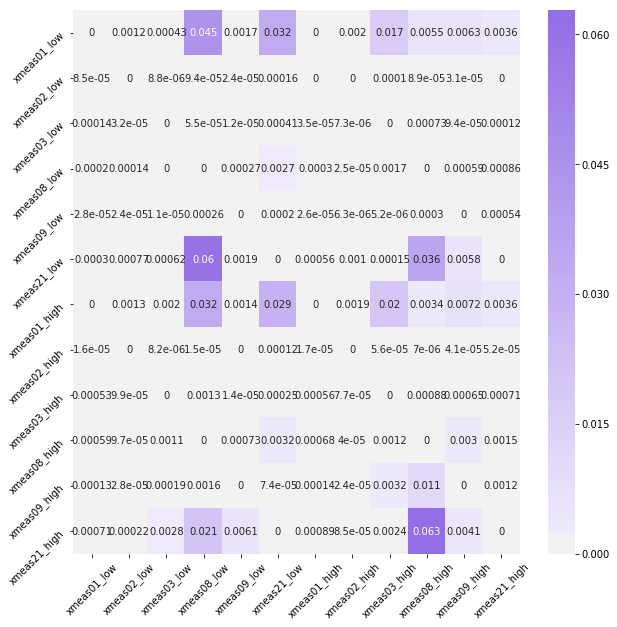

In [24]:
df_normal =  pd.DataFrame(te_matrix, columns = dist6_sel_vars.columns, index= dist6_sel_vars.columns)
plot_mat_corrs(figsize=(10,10), annot=True, matrix = df_normal)

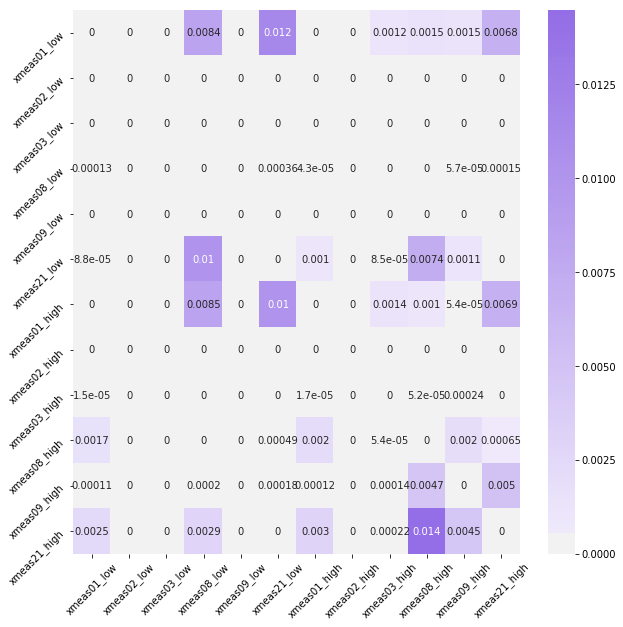

In [34]:
df_te =  pd.DataFrame(te_matrix_movel_samp_97, columns = dist6_sel_vars.columns, index= dist6_sel_vars.columns)
plot_mat_corrs(figsize=(10,10), annot=True, matrix = df_te)

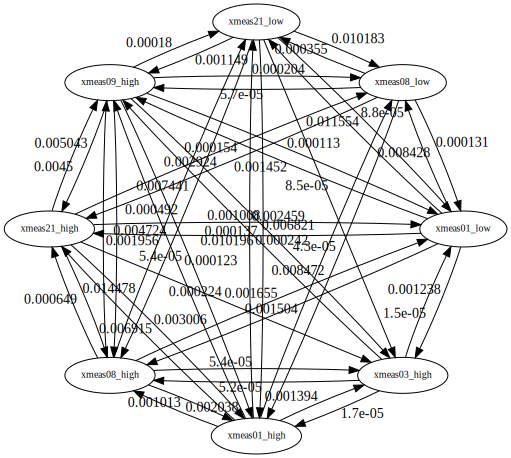

In [36]:
#plotting the graph
g = Digraph(engine='circo')
for k, row in enumerate(df_te.index):
    if any(df_te.iloc[k]) or any(df_te[row]):
        g.node(str(k),row, shape='oval', fontsize='10', width='0', rankdir="LR") 

for j, col in enumerate(df_te.columns):
    for i, row in enumerate(df_te[col]):
        if row:
            g.edge(str(i), str(j), label=str(np.round(row,6)),\
                   color="#000000{:02x}".format(int(255)))
g
#row//max(df_te.max())

In [232]:
#Timing new joint prob
b = b.astype(int)
a = a.astype(int)

count=0
for i in range(10):
    te_v = te(1,1,1,a,b,'a', 'b')
    print(te_v)
    sig_te = significance_value(1,1,1,1000,te_v, a,b)
    if(sig_te > 0.95):
        count= count + 1
count

0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522
0.06703986624873522


10

In [226]:
count

10

In [ ]:
#joint probablity for functions test
#joint_p_ih_ik_jl = np.array([0.97322404,0.00546448,0.00491803,0,0,0.00546448, 0.00546448, 0.00546448])

#aproximate results for this test

#p(ith, ik)
#jnt_p_ih_ik = [0.97868852,0.00491803,0.00546448,0.0109286] 

#p(i_t+h|i**k, j**l)
#cond_p_ih_ik_jl =  [1,0.5,0.4736841094123,0,0,0.5, 0.52631589085076,1]

#p(i_th|i_k)
#cond_p_ih_ik = [0.994711793480152,0.31035179088550,0.0552469991962,0.68964820911449]

In [ ]:
np.seterr(all='ignore')

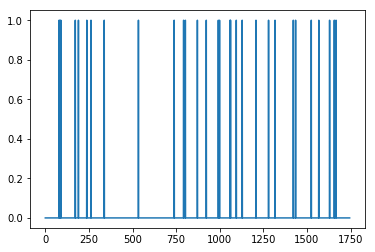

In [190]:
plt.plot(a)

In [217]:
a = np.array([1, 2, 3, 4])

def asdf(v):
    b = v.copy()
    np.random.shuffle(b)

In [218]:
asdf(a)
a

array([1, 2, 3, 4])